In [1]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

IMPLEMENTAR EL REGRESOR LINEAL DEL PROBLEMA VISTO EN CLASE, IMPLEMENTANDO SKLEARN

In [2]:
df=pd.read_csv('bmi.csv')
df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})

print("Primeras filas del dataset después de mapear Gender:\n")
print(df.head())

X = df[['Gender', 'Height', 'Weight']]
y = df['Index']

# Escalado (muy importante para SGD)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Primeras filas del dataset después de mapear Gender:

   Gender  Height  Weight  Index
0       0     174      96      4
1       0     189      87      2
2       1     185     110      4
3       1     195     104      3
4       0     149      61      3


In [ ]:
epochs = 50

reg = SGDRegressor(
    max_iter=1,            # 1 iteración por llamada a fit()  (SGD)
    learning_rate='constant',
    eta0=0.01,             # tasa de aprendizaje
    penalty=None,          
    warm_start=True,       # permite entrenar por épocas manuales
    random_state=42
)
# ESTO ES SKLEARN⬆

costs = []

print("Comenzando entrenamiento...\n")
for epoch in range(epochs):
    
    # ⬇SKLEARN: ENTRENAMIENTO⬇
    reg.fit(X_scaled, y)

    # ⬇SKLEARN: PREDICCIÓN⬇
    y_pred = reg.predict(X_scaled)

    mse = np.mean((y - y_pred)**2)
    costs.append(mse)

    if (epoch + 1) % 10 == 0:
        print(f"Época {epoch + 1}: MSE = {mse:.6f}")


REPORTE LOS PESOS W, EL BIAS Y LOS COSTOS 

In [ ]:
print(" REPORTE FINAL ")
print("Pesos W:", modelo.coef_)
print("Bias b:", modelo.intercept_[0])

print("\nLista completa de costos (MSE por época):")
print(costos)

In [63]:
print("RESULTADOS FINALES ")
print("Pesos W:", reg.coef_)
print("Bias b:", reg.intercept_)
print(f"Costo (MSE) Final: {costs[-1]:.6f}")

RESULTADOS FINALES 
Pesos W: [-0.01741967 -0.57330431  1.08622551]
Bias b: [3.7490909]
Costo (MSE) Final: 0.318697


GRAFIQUE LOS COSTOS VS LAS EPOCHS

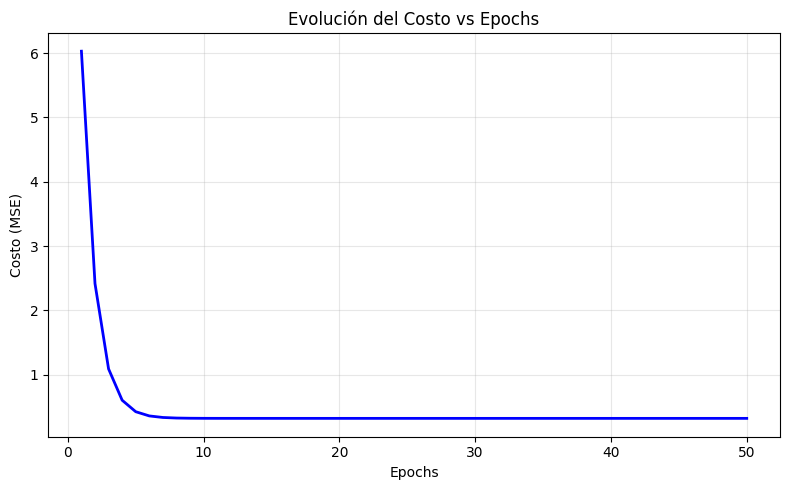

In [65]:
# Gráfica
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs + 1), costs, 'b-', linewidth=2)
plt.xlabel("Epochs")
plt.ylabel("Costo (MSE)")
plt.title("Evolución del Costo vs Epochs")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


PRESENTE LAS METRICAS DE REGRESION CON SU RESPECTIVA INTERPRETACION 

In [ ]:
y_pred_final = reg.predict(X_scaled)

mse_final = mean_squared_error(y, y_pred_final)
mae_final = mean_absolute_error(y, y_pred_final)
r2_final = r2_score(y, y_pred_final)

print("\n===== MÉTRICAS DEL MODELO =====")
print(f"MSE (Error cuadrático medio): {mse_final:.4f}")
print(f"MAE (Error absoluto medio): {mae_final:.4f}")
print(f"R2 (Coeficiente de determinación): {r2_final:.4f}")

print("\nInterpretación:")
print("• MSE: mide el error cuadrático; mientras menor, mejor.")
print("• MAE: error promedio simple; también debe ser bajo.")
print("• R2: qué tanto del comportamiento real explica el modelo (1 = perfecto).")


 METRICAS DE REGRESIÓN
R^2: 0.8261 - Explica el % de varianza en los datos
MSE: 0.3187 - Error cuadrático promedio
MAE: 0.4521 - Error absoluto promedio
RMSE: 0.5645 - Error en unidades originales


SIMULE UNA MUESTRA NUEVA (COMO SI FUERA UN PACIENTE NUEVO) Y HAGA PREDICCION CON EL ALGORITMO ENTRENADO

In [ ]:
print("\n PREDICCIÓN NUEVO PACIENTE ")
nuevo_paciente = np.array([[1, 1.65, 70]])  # mujer, 1.65m, 70kg
nuevo_escalado = scaler.transform(nuevo_paciente)
prediccion = reg.predict(nuevo_escalado)
print("\n")
print(f"Datos paciente: Gender={nuevo_paciente[0,0]}, Height={nuevo_paciente[0,1]}, Weight={nuevo_paciente[0,2]}")
print(f"Predicción del índice: {prediccion[0]:.2f}")


 PREDICCIÓN NUEVO PACIENTE 
Datos paciente: Gender=1.0, Height=1.65, Weight=70.0
Predicción del índice: 8.42
